# **DATA PROCESSING**

Sisfy Anjani

topik :[heart desiase](https://drive.google.com/file/d/1ozQbaSe_eUOiFvE1UxZChYDogfQNTiux/view?usp=sharing)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

#connect to drive
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

df = pd.read_csv('/content/drive/MyDrive/MSIB Startup Campus DSAI Batch 6 /Dataset/heart.csv')
df

Mounted at /content/drive/


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1




> Memiliki 1025 baris (1 baris objek) dan 14 kolom



In [ ]:
#Melihat deskripsi
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
#Mengelompokkan kolom yang bersifat numerical dan categorical
categoricals = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
numericals = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [ ]:
#Menampilkan deskripsi categorical data
df[categoricals].describe()

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,0.695610,0.942439,0.149268,0.529756,0.336585,1.385366,0.754146,2.323902,0.513171
std,0.460373,1.029641,0.356527,0.527878,0.472772,0.617755,1.030798,0.620660,0.500070
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,1.000000
75%,1.000000,2.000000,0.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000
max,1.000000,3.000000,1.000000,2.000000,1.000000,2.000000,4.000000,3.000000,1.000000


In [ ]:
#Menampilkan deskripsi numerical data
df[numericals].describe()

,age,trestbps,chol,thalach,oldpeak
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512
std,9.072290,17.516718,51.59251,23.005724,1.175053
min,29.000000,94.000000,126.00000,71.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000
75%,61.000000,140.000000,275.00000,166.000000,1.800000
max,77.000000,200.000000,564.00000,202.000000,6.200000


# **Data Preparation**

##  1. Missing Value



In [ ]:
# Melihat info apa saja yang ada pada dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
# Melihat kolom apa saja yang memiliki Nan
missing_value = df.isnull().sum()
missing_value

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


> Karena semua kolom menghasilkan 0 artinya tidak ada missing value




## 2. Duplicate Value

In [ ]:
#Melihat data pada baris yang duplikat
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1020     True
1021     True
1022     True
1023     True
1024     True
Length: 1025, dtype: bool



> ada beberapa baris yang duplikan karna ada nilai true



In [ ]:
# Melihat berapa jumlah data yang duplikat
df1 = df.duplicated().sum()
print('Data yang duplikat ada sebanyak ' + str(df1))

Data yang duplikat ada sebanyak 723


In [ ]:
#Menampilkan data yang duplikat
a = df.duplicated().sum()
duplicated_rows = df[df.duplicated()].head(a)
duplicated_rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
43,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
55,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
61,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
df.duplicated().any()

True

In [ ]:
#menghilangkan data duplikat
df.drop_duplicates(inplace=True)

In [ ]:
#Menghitung kembali berapa data  yang duplikat
df.duplicated().sum()

0

In [ ]:
#Menampilkan dataset setelah di hilangkan duplikat
df1 = df.drop_duplicates()
df1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0




> dataset yang awalnya sebanyak 1025 baris dan 14 kolom, tetapi karena ada data yang duplikat sebanyak 723 sehingga di drop dan sisa nya adalah
**302 baris dengan 14 kolom.**




## 3. Outlier

In [ ]:
#Menampilkan descripsi
df1.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000




> Perhatikan bagian max dimana untuk  quartal 3 (75%) memiliki perbandingan yang cukup jauh sehingga menimbulkan outlier. terutama pada kolom numerical seperti trestbps yang max 200 sedangkan di quartil 3 saja datanya 140.



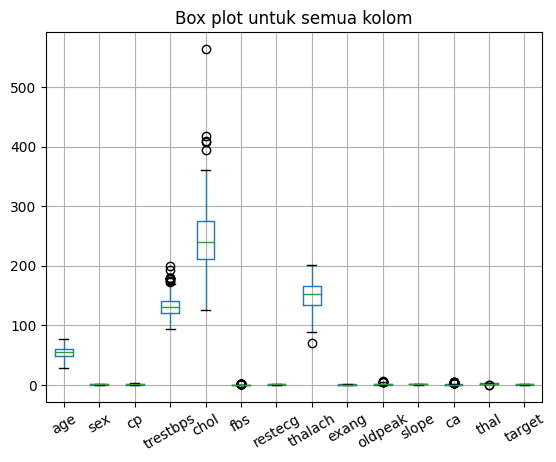

In [ ]:
#Menampilkan boxplot semua kolom
df.boxplot()
plt.title('Box plot untuk semua kolom')
plt.xticks(rotation=30)
plt.show()



> kolom trestbps,chol memiliki outlier yang cukup banyak, sedangkan cp,fbs, oldpeak,ca dan thal memiliki outlier tetapi tidak banyak sedangkan age, sex, cp, restecg, exang, slope dan target tidak memiliki outlier



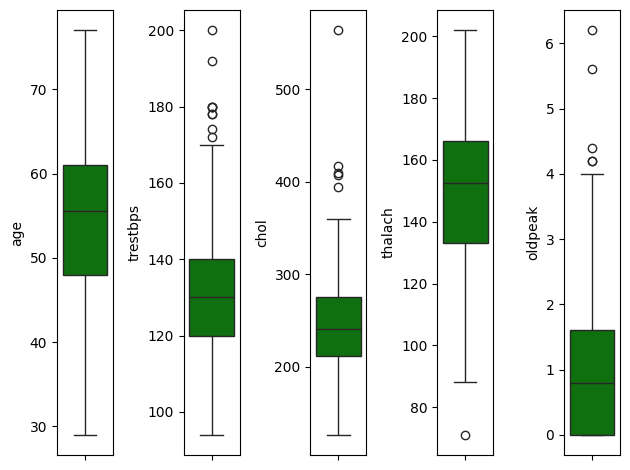

In [ ]:
features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df1[features[i]], color='green')
    plt.tight_layout()



> Outlier banyak di kolom trestbps, chol, thalach dan oldpeak maka kita lakukan pembersihan outlier



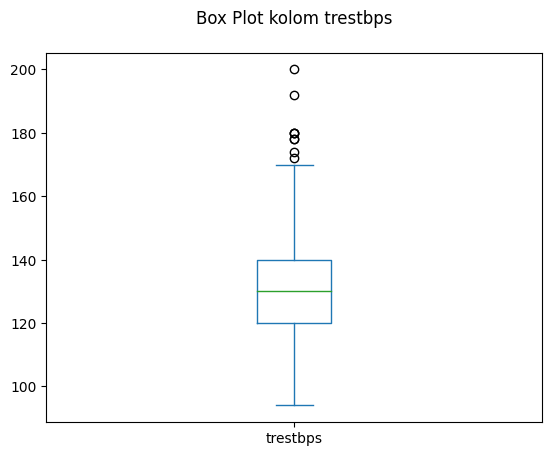

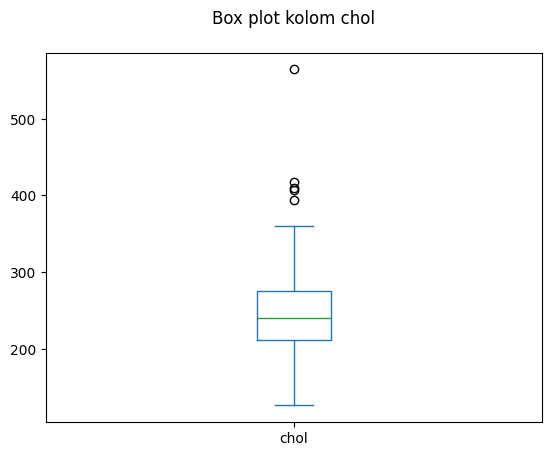

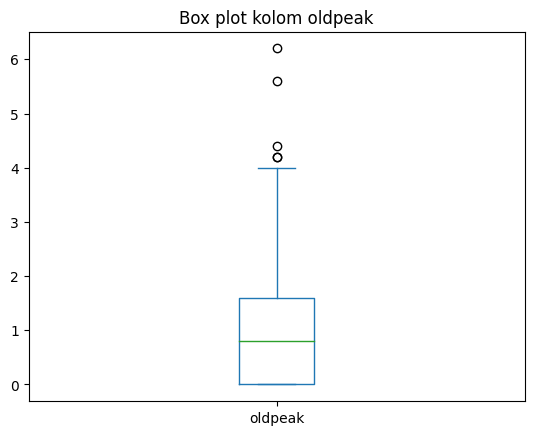

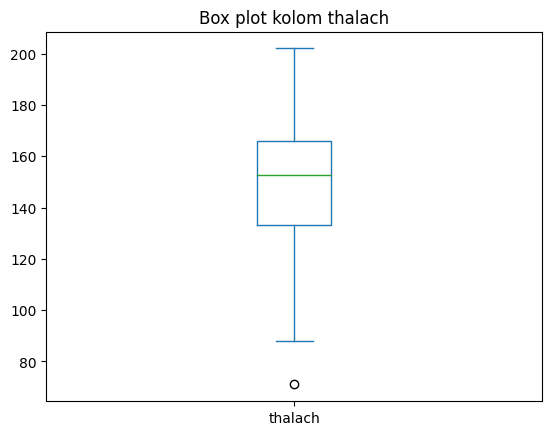

In [ ]:
#untuk memperjelas boxplot trestbps
df1['trestbps'].plot(kind='box')
plt.title('Box Plot kolom trestbps\n')
plt.show()

#kolom boxplpt chol
df1['chol'].plot(kind='box')
plt.title('Box plot kolom chol\n')
plt.show()

#kolom boxplot oldpeak
df1['oldpeak'].plot(kind='box')
plt.title('Box plot kolom oldpeak')
plt.show()

#kolom boxplot thalach
df1['thalach'].plot(kind='box')
plt.title('Box plot kolom thalach')
plt.show()



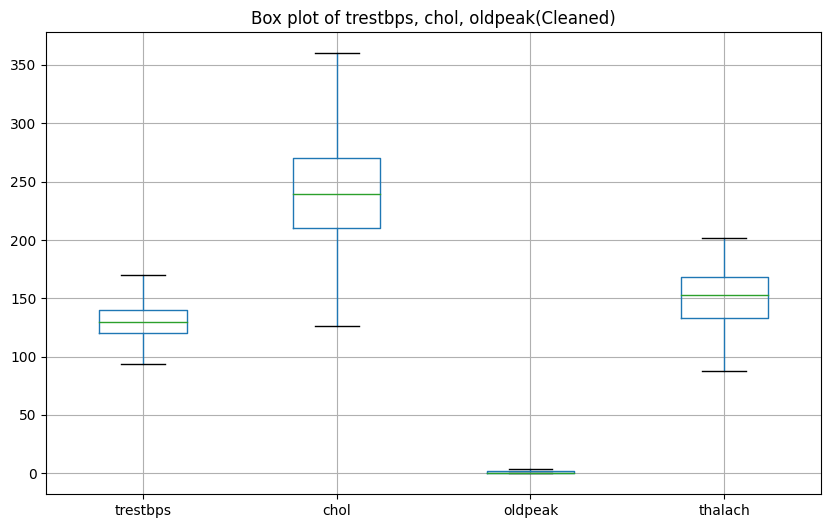

In [ ]:
# Menghitung quartal1 dan quartal3
q1 = df1[['trestbps', 'chol', 'oldpeak', 'thalach']].quantile(0.25)
q3 = df1[['trestbps', 'chol', 'oldpeak', 'thalach']].quantile(0.75)

# Menghitung iqr
iqr = q3 - q1

# Menghitung batas bawah dan batas atas
Lower = q1 - 1.5 * iqr
Upper = q3 + 1.5 * iqr

# Identifikasi dan Hapus outlier dari DataFrame
df1_cleaned = df1[
                  (df1['trestbps'] >= Lower['trestbps']) & (df1['trestbps'] <= Upper['trestbps']) &
                  (df1['chol'] >= Lower['chol']) & (df1['chol'] <= Upper['chol']) &
                  (df1['oldpeak'] >= Lower['oldpeak']) & (df1['oldpeak'] <= Upper['oldpeak']) &
                  (df1['thalach'] >= Lower['thalach']) & (df1['thalach'] <= Upper['thalach'])
                  ]

# Tampilkan box plot setelah menghapus outlier
plt.figure(figsize=(10,6))
df1_cleaned.boxplot(column=['trestbps', 'chol', 'oldpeak', 'thalach'])
plt.title('Box plot of trestbps, chol, oldpeak(Cleaned)')
plt.show()




> outlier sudah teratasi



## 4. Imbalance Data

In [ ]:
#Menampilkan value count dari tiap kolom categorical
for col in categoricals[0:]:
  print(f'value count dari kolom {col} yaitu')
  print(df1[col].value_counts(), '\n')

value count dari kolom sex yaitu
sex
1    206
0     96
Name: count, dtype: int64 

value count dari kolom cp yaitu
cp
0    143
2     86
1     50
3     23
Name: count, dtype: int64 

value count dari kolom fbs yaitu
fbs
0    257
1     45
Name: count, dtype: int64 

value count dari kolom restecg yaitu
restecg
1    151
0    147
2      4
Name: count, dtype: int64 

value count dari kolom exang yaitu
exang
0    203
1     99
Name: count, dtype: int64 

value count dari kolom slope yaitu
slope
2    141
1    140
0     21
Name: count, dtype: int64 

value count dari kolom ca yaitu
ca
0    175
1     65
2     38
3     20
4      4
Name: count, dtype: int64 

value count dari kolom thal yaitu
thal
2    165
3    117
1     18
0      2
Name: count, dtype: int64 

value count dari kolom target yaitu
target
1    164
0    138
Name: count, dtype: int64 





> Data diatas memiliki perbandingan yang cukup jauh antar nilai sehingga memiliki skala yang sedikit jauh satu sama lain seperti kolom thal dimana 0 hanya bernilai 2.



In [ ]:
#Menampilkan value count dari tiap kolom numerical
for col in numericals[0:]:
  print(f'value count dari kolom {col} yaitu')
  print(df1[col].value_counts(), '\n')

value count dari kolom age yaitu
age
58    19
57    17
54    16
59    14
52    13
51    12
44    11
60    11
56    11
62    11
41    10
64    10
67     9
63     9
42     8
43     8
65     8
53     8
61     8
45     8
55     8
50     7
46     7
66     7
48     7
49     5
47     5
68     4
70     4
35     4
39     4
69     3
40     3
71     3
37     2
38     2
34     2
76     1
29     1
77     1
74     1
Name: count, dtype: int64 

value count dari kolom trestbps yaitu
trestbps
120    37
130    36
140    32
110    19
150    17
138    12
128    12
125    11
160    11
112     9
132     8
118     7
135     6
108     6
124     6
152     5
134     5
145     5
122     4
100     4
170     4
115     3
136     3
180     3
126     3
142     3
105     3
144     2
102     2
94      2
146     2
178     2
148     2
174     1
165     1
156     1
164     1
172     1
155     1
114     1
200     1
154     1
106     1
104     1
192     1
129     1
117     1
123     1
101     1
Name: count, dtype: int64 

v

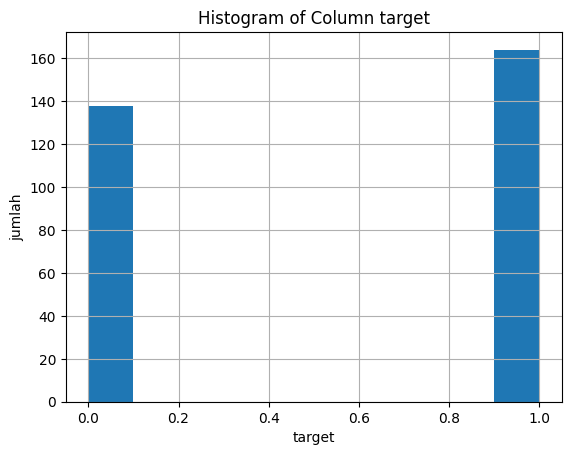

In [ ]:
#menampilkan value kolom dalam bentuk histogram
df1['target'].hist()
plt.xlabel('target')
plt.ylabel('jumlah')
plt.title('Histogram of Column target')
plt.show()

In [ ]:
# Resolve data imbalanced dengan RandomOverSampler
ros = RandomOverSampler()
X = df1.drop('target', axis=1)
y = df1['target']
X_resampled, y_resampled = ros.fit_resample(X, y)
df1_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df1_resampled['target'] = y_resampled

In [ ]:
y_resampled.value_counts()

target
0    164
1    164
Name: count, dtype: int64

## 5. Future Encoding

Tidak diperlukan, karena untuk melakukan One Hot Encoding diperlukan data dalam bentuk string sedangkan dari 14 kolom diatas bertipe data numerik(float dan integer)

# **Exploratory Data Analysis (EDA)**

## 1. Mengelaborasi Features dan Tipe Data (Nominal, Ordinal, Numerical)

In [ ]:
#Untuk data numerical dan categorical telah di def sedangkan ordinal belum
#diketahui pada dataframe tidak ada data ordinal
ordinals = []
# Menampilkan tipe data fitur
print("Tipe data pada data heart diseases :")
for feature in df1.columns:
    if feature in categoricals:
        print(f"{feature}: Nominal")
    elif feature in ordinals:
        print(f"{feature}: Ordinal")
    elif feature in numericals:
        print(f"{feature}: Numerical")
    else:
        print(f"{feature}: Unknown")

Tipe data pada data heart diseases :
age: Numerical
sex: Nominal
cp: Nominal
trestbps: Numerical
chol: Numerical
fbs: Nominal
restecg: Nominal
thalach: Numerical
exang: Nominal
oldpeak: Numerical
slope: Nominal
ca: Nominal
thal: Nominal
target: Nominal




> Terdapat 5 kolom data numerical dan 9 kolom data nominal.



## 2. Menjelaskan Kondisi serta Perbedaan Penggunaan Mean, Median dan Modus

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB




> Jika terdapat missing value maka untuk menghandle nya adalah dengan menggunakan mean, modus dan median sesuai tipe data, tetapi karena pada dataframe ini tidak ada missing value maka tidak perlu digunakan. perlu diketahui :

1. **Mean dan Median** (mean = *nilai rata-rata* dengan jumlahkan semua data lalu dibagi dua, median = *titik tengah* data setelah diurutkan dari yang terkecil)
 digunakan pada saat tipe data yaitu float/integer. seperti pada contoh tipe data diatas bahwa ada integer dengan 13 kolom dan float 1 kolom maka jika terjadi missing value bisa digunakan mean atau median.

2. **Modus** (data paling sering muncul)
 digunakan untuk tipe data yaitu string seperti jenis kelamin tetapi value nya female dan male bukan 1 = male dan 0 = female ini termasuk kedalam data integer.





## 3. Menemukan dan Mendeskripsikan Statistical Five Summaries

In [ ]:
statis_summery = df1.describe()
statis_summery

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
#menampilkan deskripsi statistika
print('\nDescription of Statistikal Five Summeries : \n')
#defenisikan
for col in statis_summery.columns:
  print(f"fitur kolom : {col}")
  print(f"mean : {statis_summery[col]['mean']}")
  print(f"minimum : {statis_summery[col]['min']}")
  print(f"quartil1 : {statis_summery[col]['25%']}")
  print(f"median : {statis_summery[col]['50%']}")
  print(f"quartil3 : {statis_summery[col]['75%']}")
  print(f"maximum : {statis_summery[col]['max']}")
  print(f"standar deviasi : {statis_summery[col]['std']}\n")

#tampilkan


Description of Statistikal Five Summeries : 

fitur kolom : age
mean : 54.420529801324506
minimum : 29.0
quartil1 : 48.0
median : 55.5
quartil3 : 61.0
maximum : 77.0
standar deviasi : 9.047969746247457

fitur kolom : sex
mean : 0.6821192052980133
minimum : 0.0
quartil1 : 0.0
median : 1.0
quartil3 : 1.0
maximum : 1.0
standar deviasi : 0.46642573806726434

fitur kolom : cp
mean : 0.9635761589403974
minimum : 0.0
quartil1 : 0.0
median : 1.0
quartil3 : 2.0
maximum : 3.0
standar deviasi : 1.0320436419542316

fitur kolom : trestbps
mean : 131.60264900662253
minimum : 94.0
quartil1 : 120.0
median : 130.0
quartil3 : 140.0
maximum : 200.0
standar deviasi : 17.56339423003756

fitur kolom : chol
mean : 246.5
minimum : 126.0
quartil1 : 211.0
median : 240.5
quartil3 : 274.75
maximum : 564.0
standar deviasi : 51.75348865574056

fitur kolom : fbs
mean : 0.1490066225165563
minimum : 0.0
quartil1 : 0.0
median : 0.0
quartil3 : 0.0
maximum : 1.0
standar deviasi : 0.3566860293648133

fitur kolom : restec



> Dapat dilihat **Standard Deviation (Standar Deviasi/std)** adalah ukuran statistik yang mengukur seberapa jauh data tersebar dari rata-ratanya. setiap kolom, diketahui bahwa :
- Jika semakin **rendah nilai Standar Deviasi maka sebagian besar nilai pada kolom semakin mendekati rata-rata** sedangkan
- Jika semakin **tinggi nilai Standar Deviasi maka semakin besar penyebaran datanya serta semakin jauh dari nilai rata-rata.**
 MAKA
 1. Misalkan pada kolom age memiliki Standar Deviasi: 9.047969746247457 dan Rata-rata (Mean): 54.420529801324506 artinya kolom ini memiliki variasi yang cukup rendah dari nilai rata-ratnya sehingga sebagian besar nilai pada kolom mendekati nilai rata-rata dan variasi yang sedikit.
 2. Misalkan kolom cp memiliki Standar Deviasi: 1.0320436419542316 dan Rata-rata (Mean): 0.9635761589403974 artinya kolom ini memiliki variasi yang cukup besar dari nilai rata-ratanya sehingga variasi penyebarannya ada yang jauh dari nilai rata-rata.






## 4. Mendeskripsikan Distribusi Data

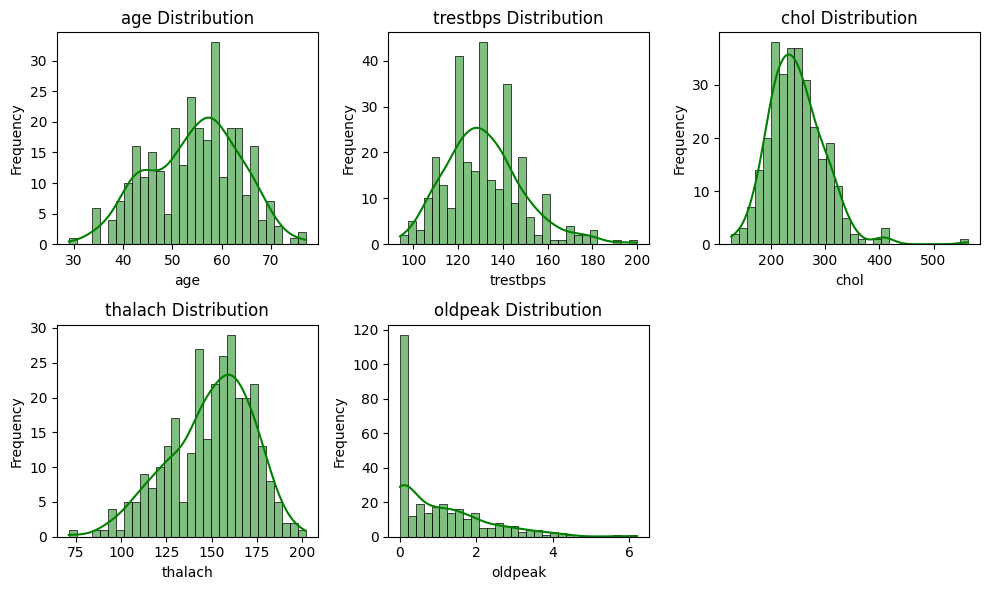

In [ ]:
#Kita gunakan data numericals
numericals

#mendesain ukuran gambar
plt.figure(figsize=(10,6))

#mendeskripsikan kolom apa saja yang digunakan
num_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

#defenisikan
for i, column in enumerate(num_features):
  plt.subplot(2, 3, i+1)
  sns.histplot(df1[column], color='green', kde=True, bins=30)

  plt.title(f"{column} Distribution" )
  plt.xlabel(f"{column}")
  plt.ylabel("Frequency")

#menampilan
plt.tight_layout()
plt.show()

Deskripsi

1. Kolom Age (distribusi tidak normal)
2. Kolom trestbps (distribusi condong ke kanan )
3. Kolom chol (mendekati distribusi normal)
4. Kolom thalach (distribusi condong ke kanan)
5. Kolom oldpeak (distribusi eksponensial)

referensi
https://sixsigmastudyguide.com/data-distributions/

# **Feature Engineering**

Membuat minimal 10 fitur baru yang relevan dan signifikan untuk dapat membantu :
- Sales/Marketing
Bisnis ecommerce dalam menghadapi tantangan bisnis yang ada.
- Heart disease
Membuat langkah preventif untuk mengurangi dampak dari heart disease tersebut.

saya menggunakan **heart disease**

kolom yang tersedia :
1. age = umur
2. sex = jenis kelamin (1 = male, 0 = female)
2. cp = jenis nyeri dada (4 nilai)
3. trestbps = tekanan darah istirahat
4. chol = kolestreol serum dalam mg/dl
5. fbs = gula darah > 120 mg/dl
6. restecg = hasil elektrokordiografi (nilai 0,1,2)
7. thalach = detak jantung maksimum tercapai
8. exang = angina akibat  olahraga
9. oldpeak = depresi yang disebabkan oleh olahraga diabandingkan istirahat
10. slope = kemiringan puncak latihan segmen ST
11. ca = jumlah pembuluh besar (0-4)
12. thal = thalassemia adalah kelompok penyakit darah yang diturunkan dan ditandai oleh kurangnya hemoglobin dan sel darah merah yang sehat (0 : tidak ada, 1 : ringan, 2 : sedang, 3 : berat)
13. target = untuk mengacu pada adanya penyakit jantung pada pasien atau tidak (0 = tidak ada penyakit jantung, 1 = ada penyakit jantung)

In [ ]:
#dataframe yang digunakan
df1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


**- Merenovasi dataframe**

In [ ]:
#membuat kolom sex menjadi string dengan 1 = male dan 0 = female
df['sex'] = df1['sex'].map({1: 'male', 0: 'female'})

# Tampilkan DataFrame hasil
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,male,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,male,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,male,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,male,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,female,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,female,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,female,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,male,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,male,3,160,273,0,0,125,0,0.0,2,0,2,0


In [ ]:
#mengurutkan berdasarkan umur paling rendah ke paling tinggi
df_sorted = df.sort_values(by='age')

# Tambahkan kolom nomor urut
df_sorted['nomor'] = range(1, len(df) + 1)

# Ambil nama kolom terakhir
last_column = df_sorted.columns[-1]

# Pindahkan kolom terakhir menjadi kolom pertama
df_sorted.insert(0, last_column, df_sorted.pop(last_column))

# Atur kolom 'nama' sebagai indeks
df_sorted.set_index('nomor', inplace=True)

# Hapus kolom indeks
df_reset = df_sorted.reset_index(drop=True)
df_reset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,29,male,1,130,204,0,0,202,0,0.0,2,0,2,1
1,34,male,3,118,182,0,0,174,0,0.0,2,0,2,1
2,34,female,1,118,210,0,1,192,0,0.7,2,0,2,1
3,35,female,0,138,183,0,1,182,0,1.4,2,0,2,1
4,35,male,1,122,192,0,1,174,0,0.0,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,71,female,2,110,265,1,0,130,0,0.0,2,1,2,1
298,71,female,1,160,302,0,1,162,0,0.4,2,2,2,1
299,74,female,1,120,269,0,0,121,1,0.2,2,1,2,1
300,76,female,2,140,197,0,2,116,0,1.1,1,0,2,1


**- Insight yang berguna**

## cp (nyeri dada)

In [ ]:
#menghitung jenis nyeri dada (0,1,2,3)
print('jumlah tipe nyeri dada : ')
tipe_nyeri_dada = df_reset['cp'].map({0 : 'nyeri dada tidak ada', 1 : 'nyeri dada ringan', 2 : 'nyeri dada sedang', 3 : 'nyeri dada berat'}).value_counts()
tipe_nyeri_dada

jumlah tipe nyeri dada : 


cp
nyeri dada tidak ada    143
nyeri dada sedang        86
nyeri dada ringan        50
nyeri dada berat         23
Name: count, dtype: int64

> Skala ini menunjukkan semakin berat nyeri dada maka semakin tinggi potensi terkena serangan jantung dan mengganggu aktivitas. Pada tipe nyeri dada berat diharapkan ke dokter untuk pemeriksaan dan pengobatan.



In [ ]:
#masukkan kedalam dataframe
# Membuat kolom baru dengan menggunakan mapping dari 'cp' untuk tingkat nyeri dada
df_reset['tipe_nyeri_dada'] = df_reset['cp'].map({0 : 'nyeri dada tidak ada', 1 : 'nyeri dada ringan', 2 : 'nyeri dada sedang', 3 : 'nyeri dada berat'})

# Menampilkan dataframe dengan kolom baru
df_reset


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,tipe_nyeri_dada
0,29,male,1,130,204,0,0,202,0,0.0,2,0,2,1,nyeri dada ringan
1,34,male,3,118,182,0,0,174,0,0.0,2,0,2,1,nyeri dada berat
2,34,female,1,118,210,0,1,192,0,0.7,2,0,2,1,nyeri dada ringan
3,35,female,0,138,183,0,1,182,0,1.4,2,0,2,1,nyeri dada tidak ada
4,35,male,1,122,192,0,1,174,0,0.0,2,0,2,1,nyeri dada ringan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,71,female,2,110,265,1,0,130,0,0.0,2,1,2,1,nyeri dada sedang
298,71,female,1,160,302,0,1,162,0,0.4,2,2,2,1,nyeri dada ringan
299,74,female,1,120,269,0,0,121,1,0.2,2,1,2,1,nyeri dada ringan
300,76,female,2,140,197,0,2,116,0,1.1,1,0,2,1,nyeri dada sedang


## trestbps (tekanan darah istirahat)

In [ ]:
#secara umum tekanan darah normal tergantung beberapa faktor salah satunya faktor usia
#Tekanan Darah Sistolik (Tekanan Darah Atas): Kurang dari 120 mmHg
#Tekanan Darah Diastolik (Tekanan Darah Bawah): Kurang dari 80 mmHg
# artinya jika normal maka 80 <= x <= 120
#sehingga selain itu maka tidak normal
print('tekanan darah pada pasien dengan golongan : ')
tekanan_darah = df_reset['trestbps'].apply(lambda x : 'normal' if 80 <= x <= 120 else 'tidak normal')
tekanan_darah.value_counts()

tekanan darah pada pasien dengan golongan : 


trestbps
tidak normal    205
normal           97
Name: count, dtype: int64



> Banyak sekali pasien yang memiliki tekanan darah tidak normal yaitu sebanyak 205 pasien dari 302 pasien



In [ ]:
#korelasi antar -1 dan 1, jika mendekati -1 artinya korelasi negatif yang kuat
#sedangkan jika menuju 1 maka korelasi positif yang kuat
#jika menuju 0 maka menunjukkan kurangnya hubungan linear
#korelasi antara nyeri dada dengan tekanan darah istirahat
korelasi = df_reset['cp'].corr(df_reset['trestbps'])

# Tampilkan hasil korelasi
print("Korelasi antara nyeri dada dan tekanan darah istirahat:", korelasi)

Korelasi antara nyeri dada dan tekanan darah istirahat: 0.04648642405741086




> karena korelasi antara nyeri dada dan tekanan darah istirahat sekitar 0.046 dan bisa dikatakan mendekati 0, artinya tidak ada hubungan linear yang terlalu signifikan antar nyeri dada dan tekanan darah. tetapi tidak menutup kemungkinan juga jika dipengaruhi oleh faktor lain.



In [ ]:
#melihat rata-rata tekanan darah berdasarkan usia
trestbps_age = df_reset.groupby('age')['trestbps'].mean()
trestbps_age


age
29    130.000000
34    118.000000
35    126.500000
37    125.000000
38    129.000000
39    122.500000
40    134.000000
41    119.000000
42    127.000000
43    126.375000
44    120.727273
45    122.375000
46    128.000000
47    119.600000
48    124.285714
49    126.400000
50    130.428571
51    124.500000
52    130.692308
53    132.625000
54    129.125000
55    142.125000
56    134.636364
57    136.058824
58    127.947368
59    149.214286
60    131.727273
61    138.125000
62    134.545455
63    133.555556
64    138.800000
65    138.500000
66    146.571429
67    127.777778
68    140.500000
69    146.666667
70    147.750000
71    127.333333
74    120.000000
76    140.000000
77    125.000000
Name: trestbps, dtype: float64

In [ ]:
#masukkan insight ke dalam kolom dataframe
df_reset['tekanan_darah'] = df_reset['trestbps'].apply(lambda x : 'normal' if 80 <= x <= 120 else 'tidak normal')

#tampilkan
df_reset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,tipe_nyeri_dada,tekanan_darah
0,29,male,1,130,204,0,0,202,0,0.0,2,0,2,1,nyeri dada ringan,tidak normal
1,34,male,3,118,182,0,0,174,0,0.0,2,0,2,1,nyeri dada berat,normal
2,34,female,1,118,210,0,1,192,0,0.7,2,0,2,1,nyeri dada ringan,normal
3,35,female,0,138,183,0,1,182,0,1.4,2,0,2,1,nyeri dada tidak ada,tidak normal
4,35,male,1,122,192,0,1,174,0,0.0,2,0,2,1,nyeri dada ringan,tidak normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,71,female,2,110,265,1,0,130,0,0.0,2,1,2,1,nyeri dada sedang,normal
298,71,female,1,160,302,0,1,162,0,0.4,2,2,2,1,nyeri dada ringan,tidak normal
299,74,female,1,120,269,0,0,121,1,0.2,2,1,2,1,nyeri dada ringan,normal
300,76,female,2,140,197,0,2,116,0,1.1,1,0,2,1,nyeri dada sedang,tidak normal


## chol (kolestrol)

In [ ]:
#kategori kolestrol
#Normal: Kurang dari 200 mg/dL
#Borderline tinggi: 200-239 mg/dL
#Tinggi: 240 mg/dL atau lebih
#melihat berapa pasian yang tergolong kolestrol normal
print('Pasien yang tergolong kategori kolestrol : ')
kategori_kolestrol = df_reset['chol'].apply(lambda x : 'normal' if x < 200 else  ('borderline tinggi' if 200<= x <= 239 else 'tinggi'))
kategori_kolestrol.value_counts()

Pasien yang tergolong kategori kolestrol : 


chol
tinggi               155
borderline tinggi     98
normal                49
Name: count, dtype: int64



> Didapatkan bahwa banyak sekali pasien yang memiliki kolestrol yang tinggi, sehingga tidak menutup kemungkinan ini menjadi faktor pendukung penyakit jantung.



In [ ]:
#korelasi antara kolestrol dan target
print('korelasi antara kolestrol dengan target : ')
korelasi = df_reset['chol'].corr(df_reset['trestbps'])
korelasi

korelasi antara kolestrol dengan target : 


0.1252562855553672



> tanpa melihat faktor lain terlebih dahulu, ternyata kolestrol dengan tekanan darah memiliki korelasi positif lemah artinya hubungan linear positif tapi tidak terlalu kuat.



In [ ]:
#masukkan insight kedalam dataframe
df_reset['kategori_kolestrol'] = df_reset['chol'].apply(lambda x : 'normal' if x < 200 else  ('borderline tinggi' if 200<= x <= 239 else 'tinggi'))

#tampilkan
df_reset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,tipe_nyeri_dada,tekanan_darah,kategori_kolestrol
0,29,male,1,130,204,0,0,202,0,0.0,2,0,2,1,nyeri dada ringan,tidak normal,borderline tinggi
1,34,male,3,118,182,0,0,174,0,0.0,2,0,2,1,nyeri dada berat,normal,normal
2,34,female,1,118,210,0,1,192,0,0.7,2,0,2,1,nyeri dada ringan,normal,borderline tinggi
3,35,female,0,138,183,0,1,182,0,1.4,2,0,2,1,nyeri dada tidak ada,tidak normal,normal
4,35,male,1,122,192,0,1,174,0,0.0,2,0,2,1,nyeri dada ringan,tidak normal,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,71,female,2,110,265,1,0,130,0,0.0,2,1,2,1,nyeri dada sedang,normal,tinggi
298,71,female,1,160,302,0,1,162,0,0.4,2,2,2,1,nyeri dada ringan,tidak normal,tinggi
299,74,female,1,120,269,0,0,121,1,0.2,2,1,2,1,nyeri dada ringan,normal,tinggi
300,76,female,2,140,197,0,2,116,0,1.1,1,0,2,1,nyeri dada sedang,tidak normal,normal


## fbs (gula darah puasa > 120 mg/dl)

In [ ]:
#nilai gula darah yang diukur setelah tidak makan atau minum selama minimal delapan jam.
#fbs normal (0) dengan kadar di bawah atau sama dengan 120 mg/dL. biasanya kisaran 70-100 mg/dl.
#fbs tinggi (1) dengan kadar di atas 120 mg/dL.

#nilai pada fbs
print('kategori gula darah pasien : ')
kategori_gula_darah = df_reset['fbs'].map({0 : 'normal', 1 : 'tinggi'}).value_counts()
kategori_gula_darah

kategori gula darah pasien : 


fbs
normal    257
tinggi     45
Name: count, dtype: int64



> untuk gula darah ternyata banyak yang normal yaitu 257 orang sedangkan yang kadar gula darah tingggi sekitar 45 orang



In [ ]:
#rata-rata fbs berdasarkan usia
fbs_age = df_reset.groupby(['fbs'])['age'].value_counts()
fbs_age

fbs  age
0    57     15
     58     15
     54     14
     44     11
     59     11
            ..
1    61      1
     51      1
     46      1
     42      1
     71      1
Name: count, Length: 63, dtype: int64



> Dapat dianalisa dari data diatas bahwa umur kisaran dibawah 60 itu kebanyakan memiliki gula darah rendah, sedangkan yang kisaran 60-77 memiliki gula darah tinggi.



In [ ]:
#memasukkan insight kedlaam dataframe
df_reset['kategori_gula_darah'] = df_reset['fbs'].map({0 : 'normal', 1 : 'tinggi'})

#tampilkan
df_reset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,tipe_nyeri_dada,tekanan_darah,kategori_kolestrol,kategori_gula_darah
0,29,male,1,130,204,0,0,202,0,0.0,2,0,2,1,nyeri dada ringan,tidak normal,borderline tinggi,normal
1,34,male,3,118,182,0,0,174,0,0.0,2,0,2,1,nyeri dada berat,normal,normal,normal
2,34,female,1,118,210,0,1,192,0,0.7,2,0,2,1,nyeri dada ringan,normal,borderline tinggi,normal
3,35,female,0,138,183,0,1,182,0,1.4,2,0,2,1,nyeri dada tidak ada,tidak normal,normal,normal
4,35,male,1,122,192,0,1,174,0,0.0,2,0,2,1,nyeri dada ringan,tidak normal,normal,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,71,female,2,110,265,1,0,130,0,0.0,2,1,2,1,nyeri dada sedang,normal,tinggi,tinggi
298,71,female,1,160,302,0,1,162,0,0.4,2,2,2,1,nyeri dada ringan,tidak normal,tinggi,normal
299,74,female,1,120,269,0,0,121,1,0.2,2,1,2,1,nyeri dada ringan,normal,tinggi,normal
300,76,female,2,140,197,0,2,116,0,1.1,1,0,2,1,nyeri dada sedang,tidak normal,normal,normal


## restcg (hasil ektrokordiografi istirahat)

In [ ]:
#Elektrokardiogram (EKG) Tes ini merekam aktivitas listrik jantung
#dan dapat membantu mendeteksi ritme jantung yang abnormal atau tanda-tanda gangguan jantung lainnya.
#normal artinya aman, aritma memiliki gangguan irama jantung dan
#iskemia menunjukkan kurangnya aliran darah ke jantung atau kerusakan otot jantung.
#restecg memiliki 3 nilai (0=normal, 1=aritma, 2=iskemia)

#melihat jumlah pasien dengan kategori aktivitas ritme jantung
print('kategori ritme jantung pasien : ')
kategori_ritme_jantung = df_reset['restecg'].map({0 : 'normal', 1 : 'aritma', 2 : 'iskemia'})
kategori_ritme_jantung. value_counts()

kategori ritme jantung pasien : 


restecg
aritma     151
normal     147
iskemia      4
Name: count, dtype: int64



> ternyata banyak pasien yang menderita gangguan irama jantung yaitu 151 orang dan 4 orang yang menderika kerusakan otot pada jaringan jantung.



In [ ]:
#masukkan kedalam dataframe
df_reset['kategori_ritme_jantung'] = df_reset['restecg'].map({0 : 'normal', 1 : 'aritma', 2 : 'iskemia'})

#tampilkan
df_reset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,tipe_nyeri_dada,tekanan_darah,kategori_kolestrol,kategori_gula_darah,kategori_ritme_jantung
0,29,male,1,130,204,0,0,202,0,0.0,2,0,2,1,nyeri dada ringan,tidak normal,borderline tinggi,normal,normal
1,34,male,3,118,182,0,0,174,0,0.0,2,0,2,1,nyeri dada berat,normal,normal,normal,normal
2,34,female,1,118,210,0,1,192,0,0.7,2,0,2,1,nyeri dada ringan,normal,borderline tinggi,normal,aritma
3,35,female,0,138,183,0,1,182,0,1.4,2,0,2,1,nyeri dada tidak ada,tidak normal,normal,normal,aritma
4,35,male,1,122,192,0,1,174,0,0.0,2,0,2,1,nyeri dada ringan,tidak normal,normal,normal,aritma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,71,female,2,110,265,1,0,130,0,0.0,2,1,2,1,nyeri dada sedang,normal,tinggi,tinggi,normal
298,71,female,1,160,302,0,1,162,0,0.4,2,2,2,1,nyeri dada ringan,tidak normal,tinggi,normal,aritma
299,74,female,1,120,269,0,0,121,1,0.2,2,1,2,1,nyeri dada ringan,normal,tinggi,normal,normal
300,76,female,2,140,197,0,2,116,0,1.1,1,0,2,1,nyeri dada sedang,tidak normal,normal,normal,iskemia


## thalach (detak jantung maksimal)

In [ ]:
#melihat rata-rata detak jantung maksimal dari usia dan jenis kelamin
thalach_age_sex = df_reset.groupby(['age', 'sex'])['thalach'].mean()
thalach_age_sex

age  sex   
29   male      202.000000
34   female    192.000000
     male      174.000000
35   female    182.000000
     male      153.333333
                  ...    
70   male      122.250000
71   female    139.000000
74   female    121.000000
76   female    116.000000
77   male      162.000000
Name: thalach, Length: 73, dtype: float64

In [ ]:
#melihat rata-rata detak jantung per menit berdasarkan jenis kelamin
print('detak jantung permenit : ')
detak_jantung_gender = df.groupby('sex')['thalach'].apply(lambda x: 60 / x.mean())
detak_jantung_gender

detak jantung permenit : 


sex
female    0.397022
male      0.403105
Name: thalach, dtype: float64



> hanya sedikit perbedaan antara detak jantung per menit perempuan dan laki-laki tetapi lelaki lebih cepat detak jantung/menit nya dengan frekuensi 0.403105 sedangkan perempuan frekuensi 0.397022.



In [ ]:
# Hitung detak jantung maksimal relatif terhadap usia
detak_jantung_usia  = df_reset['thalach'] / (220 - df_reset['age'])
detak_jantung_usia


0      1.057592
1      0.935484
2      1.032258
3      0.983784
4      0.940541
         ...   
297    0.872483
298    1.087248
299    0.828767
300    0.805556
301    1.132867
Length: 302, dtype: float64

In [ ]:
#korelasi antara detak jantung maks dengan nyeri dada
print('korelasi detak jantung maks dengan nyeri dada : ')
korelasi = df_reset['thalach'].corr(df_reset['cp'])
korelasi

korelasi detak jantung maks dengan nyeri dada : 


0.2933665820060733



> Bisa dilihat korelasi mengarah ke 1 tetapi masih jauh, maka ini korelasi positif yang lemah artinya memliliki nilai linear yang lemah tetapi positif(diluar faktor lain)



In [ ]:
# Hitung detak jantung maksimal relatif terhadap usia
df_reset['detak_jantung_usia'] = df_reset['thalach'] / (220 - df_reset['age'])

#tampilkan
df_reset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,tipe_nyeri_dada,tekanan_darah,kategori_kolestrol,kategori_gula_darah,kategori_ritme_jantung,detak_jantung_usia
0,29,male,1,130,204,0,0,202,0,0.0,2,0,2,1,nyeri dada ringan,tidak normal,borderline tinggi,normal,normal,1.057592
1,34,male,3,118,182,0,0,174,0,0.0,2,0,2,1,nyeri dada berat,normal,normal,normal,normal,0.935484
2,34,female,1,118,210,0,1,192,0,0.7,2,0,2,1,nyeri dada ringan,normal,borderline tinggi,normal,aritma,1.032258
3,35,female,0,138,183,0,1,182,0,1.4,2,0,2,1,nyeri dada tidak ada,tidak normal,normal,normal,aritma,0.983784
4,35,male,1,122,192,0,1,174,0,0.0,2,0,2,1,nyeri dada ringan,tidak normal,normal,normal,aritma,0.940541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,71,female,2,110,265,1,0,130,0,0.0,2,1,2,1,nyeri dada sedang,normal,tinggi,tinggi,normal,0.872483
298,71,female,1,160,302,0,1,162,0,0.4,2,2,2,1,nyeri dada ringan,tidak normal,tinggi,normal,aritma,1.087248
299,74,female,1,120,269,0,0,121,1,0.2,2,1,2,1,nyeri dada ringan,normal,tinggi,normal,normal,0.828767
300,76,female,2,140,197,0,2,116,0,1.1,1,0,2,1,nyeri dada sedang,tidak normal,normal,normal,iskemia,0.805556


## exang (angina akibat olahraga)

In [ ]:
#0: Tidak ada angina yang disebabkan oleh olahraga.
#1: Ada angina yang disebabkan oleh olahraga.
#melihat nilai angina
print('angina setelah selesai olahraga pada pasien : ')
angina_setelah_olahraga = df_reset['exang'].map({0 : 'tidak ada', 1 : 'ada'}).value_counts()
angina_setelah_olahraga

angina setelah selesai olahraga pada pasien : 


exang
tidak ada    203
ada           99
Name: count, dtype: int64

In [ ]:
#masukkan kedalam datframe
df_reset['angina_setelah_olahraga'] = df_reset['exang'].map({0 : 'tidak ada', 1 : 'ada'})

#tampilkan
df_reset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,ca,thal,target,tipe_nyeri_dada,tekanan_darah,kategori_kolestrol,kategori_gula_darah,kategori_ritme_jantung,detak_jantung_usia,angina_setelah_olahraga
0,29,male,1,130,204,0,0,202,0,0.0,...,0,2,1,nyeri dada ringan,tidak normal,borderline tinggi,normal,normal,1.057592,tidak ada
1,34,male,3,118,182,0,0,174,0,0.0,...,0,2,1,nyeri dada berat,normal,normal,normal,normal,0.935484,tidak ada
2,34,female,1,118,210,0,1,192,0,0.7,...,0,2,1,nyeri dada ringan,normal,borderline tinggi,normal,aritma,1.032258,tidak ada
3,35,female,0,138,183,0,1,182,0,1.4,...,0,2,1,nyeri dada tidak ada,tidak normal,normal,normal,aritma,0.983784,tidak ada
4,35,male,1,122,192,0,1,174,0,0.0,...,0,2,1,nyeri dada ringan,tidak normal,normal,normal,aritma,0.940541,tidak ada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,71,female,2,110,265,1,0,130,0,0.0,...,1,2,1,nyeri dada sedang,normal,tinggi,tinggi,normal,0.872483,tidak ada
298,71,female,1,160,302,0,1,162,0,0.4,...,2,2,1,nyeri dada ringan,tidak normal,tinggi,normal,aritma,1.087248,tidak ada
299,74,female,1,120,269,0,0,121,1,0.2,...,1,2,1,nyeri dada ringan,normal,tinggi,normal,normal,0.828767,ada
300,76,female,2,140,197,0,2,116,0,1.1,...,0,2,1,nyeri dada sedang,tidak normal,normal,normal,iskemia,0.805556,tidak ada


## oldpeak (depresi yang disebabkan olahraga dibandingkan istirahat)

In [ ]:
#oldpeak ini adalah istilah yang digunakan dalam konteks elektrokardiografi (EKG) dan kardiologi untuk menggambarkan penurunan segmen ST dari baseline pada gelombang
#EKG setelah terjadinya aktivitas fisik yang meningkatkan denyut jantung.
#juga merupakan bagian penting untuk mendeteksi iskemia
#Nilaioldpeak yang tinggi dapat menunjukkan adanya iskemia miokard yang signifikan.

In [ ]:
#melihat jumlah yang depresi akibat olahraga dibandingkan istirahat
print('jumlah orang yang depresi dengan value : ')
oldpeak_counts = df_reset['oldpeak'].value_counts()
oldpeak_counts

jumlah orang yang depresi dengan value : 


oldpeak
0.0    98
1.2    17
0.6    14
1.0    14
1.4    13
0.8    13
0.2    12
1.6    11
1.8    10
2.0     9
0.4     9
0.1     7
2.6     6
2.8     6
0.5     5
1.5     5
1.9     5
3.0     5
2.2     4
3.6     4
0.9     3
2.4     3
0.3     3
4.0     3
3.4     3
3.2     2
2.5     2
2.3     2
1.1     2
4.2     2
2.1     1
6.2     1
4.4     1
0.7     1
1.3     1
5.6     1
3.5     1
3.1     1
3.8     1
2.9     1
Name: count, dtype: int64



> Sesuai dengan defenisi diatas maka semakin tinggi nilai oldpeak maka kita bisa melihat restcg kategori iskemia (tingkat sakit jantung yang sudah sampai tahap kerusakan otot jaringan jantung).
nilai 0 ada 98 orang (98 orang yang normal signifikan). Bahkan ada yang oldpeak 4,2 satu orang, 4,4 satu orang, 5,6 satu orang, 6,2 satu orang (ini adalah detail dari restcg yang menyebutkan ada 4 orang yang terdetekdi iskemia).



In [ ]:
#melihat rata-rata oldpeak dari usia
oldpeak_age = df_reset.groupby('age')['oldpeak']
oldpeak_age.mean()

age
29    0.000000
34    0.350000
35    0.750000
37    1.750000
38    1.900000
39    0.300000
40    1.133333
41    0.340000
42    0.500000
43    1.300000
44    0.372727
45    0.625000
46    1.085714
47    0.220000
48    0.271429
49    0.680000
50    0.971429
51    1.266667
52    0.376923
53    0.837500
54    0.931250
55    1.950000
56    1.400000
57    0.717647
58    1.389474
59    1.078571
60    1.681818
61    1.712500
62    1.863636
63    1.700000
64    1.080000
65    1.075000
66    0.914286
67    0.988889
68    1.875000
69    1.300000
70    1.975000
71    0.666667
74    0.200000
76    1.100000
77    0.000000
Name: oldpeak, dtype: float64

## ca (jumlah pembuluh darah besar)

In [ ]:
#mempunyai nilai (0-4)
#Kategori 0: Jumlah pembuluh darah besar normal atau tidak ada kerusakan yang signifikan.
#Kategori 1: Sedikit gangguan pada pembuluh darah besar.
#Kategori 2: Kerusakan moderat pada pembuluh darah besar.
#Kategori 3: Kerusakan berat atau signifikan pada pembuluh darah besar.
#kategori 4 : Pembuluh darah besar sudah tidak bisa dilalui.

#menghitung berapa banyak ca/kategori
print('kategori pembuluh darah pasien : ')
kategori_pembuluh_darah = df_reset['ca'].map({0 : 'pembuluh darah besar normal', 1 : 'Sedikit gangguan pada pembuluh darah besar',
                                2 : 'Kerusakan moderat pada pembuluh darah besar', 3 : 'Kerusakan berat pada pembuluh darah besar', 4 : 'Pembuluh darah besar sudah tidak bisa dilalui'})
kategori_pembuluh_darah .value_counts()

kategori pembuluh darah pasien : 


ca
pembuluh darah besar normal                      175
Sedikit gangguan pada pembuluh darah besar        65
Kerusakan moderat pada pembuluh darah besar       38
Kerusakan berat pada pembuluh darah besar         20
Pembuluh darah besar sudah tidak bisa dilalui      4
Name: count, dtype: int64

In [ ]:
#memasukkan kedalam dataframe
df_reset['kategori_pembuluh_darah'] = df_reset['ca'].map({0 : 'pembuluh darah besar normal', 1 : 'Sedikit gangguan pada pembuluh darah besar',
                                2 : 'Kerusakan moderat pada pembuluh darah besar', 3 : 'Kerusakan berat pada pembuluh darah besar', 4 : 'Pembuluh darah besar sudah tidak bisa dilalui'})
df_reset.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,thal,target,tipe_nyeri_dada,tekanan_darah,kategori_kolestrol,kategori_gula_darah,kategori_ritme_jantung,detak_jantung_usia,angina_setelah_olahraga,kategori_pembuluh_darah
0,29,male,1,130,204,0,0,202,0,0.0,...,2,1,nyeri dada ringan,tidak normal,borderline tinggi,normal,normal,1.057592,tidak ada,pembuluh darah besar normal
1,34,male,3,118,182,0,0,174,0,0.0,...,2,1,nyeri dada berat,normal,normal,normal,normal,0.935484,tidak ada,pembuluh darah besar normal
2,34,female,1,118,210,0,1,192,0,0.7,...,2,1,nyeri dada ringan,normal,borderline tinggi,normal,aritma,1.032258,tidak ada,pembuluh darah besar normal
3,35,female,0,138,183,0,1,182,0,1.4,...,2,1,nyeri dada tidak ada,tidak normal,normal,normal,aritma,0.983784,tidak ada,pembuluh darah besar normal
4,35,male,1,122,192,0,1,174,0,0.0,...,2,1,nyeri dada ringan,tidak normal,normal,normal,aritma,0.940541,tidak ada,pembuluh darah besar normal
5,35,male,0,126,282,0,0,156,1,0.0,...,3,0,nyeri dada tidak ada,tidak normal,tinggi,normal,normal,0.843243,ada,pembuluh darah besar normal
6,35,male,0,120,198,0,1,130,1,1.6,...,3,0,nyeri dada tidak ada,normal,normal,normal,aritma,0.702703,ada,pembuluh darah besar normal
7,37,female,2,120,215,0,1,170,0,0.0,...,2,1,nyeri dada sedang,normal,borderline tinggi,normal,aritma,0.928962,tidak ada,pembuluh darah besar normal
8,37,male,2,130,250,0,1,187,0,3.5,...,2,1,nyeri dada sedang,tidak normal,tinggi,normal,aritma,1.021858,tidak ada,pembuluh darah besar normal
9,38,male,2,138,175,0,1,173,0,0.0,...,2,1,nyeri dada sedang,tidak normal,normal,normal,aritma,0.950549,tidak ada,Pembuluh darah besar sudah tidak bisa dilalui


## thal (kelompok penyakit darah)

In [ ]:
#Kategori 'thal' dalam konteks kesehatan jantung biasanya merujuk pada jenis thalassemia yang dialami oleh pasien
#thalassemia adalah kelompok penyakit darah yang diturunkan dan ditandai oleh kurangnya hemoglobin dan sel darah merah yang sehat
#menghitung jumlah thal yaitu,
#0: Tidak ada thalassemia yang terdeteksi.
#1: Thalassemia ringan.
#2: Thalassemia sedang.
#3: Thalassemia berat.
print('total keterangan kondisi thalassemia pasien : ')
tingkatan_thal = df_reset['thal'].map({0 : 'Tidak ada', 1 : 'ringan', 2 : 'sedang', 3 : 'berat'}).value_counts()
tingkatan_thal

total keterangan kondisi thalassemia pasien : 


thal
sedang       165
berat        117
ringan        18
Tidak ada      2
Name: count, dtype: int64



> Ternyata pasien yang kelompok penyakit darah sedang dan berat memiliki skala yang besar, sehingga menjadi salah satu faktor pendukung masalah pada kesehatan jantung


In [ ]:
#masukkan insight kedalam dataframe
df_reset['tingkatan_thal']= df_reset['thal'].map({0 : 'Tidak ada', 1 : 'ringan', 2 : 'sedang', 3 : 'berat'})

#tampilkan
df_reset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,target,tipe_nyeri_dada,tekanan_darah,kategori_kolestrol,kategori_gula_darah,kategori_ritme_jantung,detak_jantung_usia,angina_setelah_olahraga,kategori_pembuluh_darah,tingkatan_thal
0,29,male,1,130,204,0,0,202,0,0.0,...,1,nyeri dada ringan,tidak normal,borderline tinggi,normal,normal,1.057592,tidak ada,pembuluh darah besar normal,sedang
1,34,male,3,118,182,0,0,174,0,0.0,...,1,nyeri dada berat,normal,normal,normal,normal,0.935484,tidak ada,pembuluh darah besar normal,sedang
2,34,female,1,118,210,0,1,192,0,0.7,...,1,nyeri dada ringan,normal,borderline tinggi,normal,aritma,1.032258,tidak ada,pembuluh darah besar normal,sedang
3,35,female,0,138,183,0,1,182,0,1.4,...,1,nyeri dada tidak ada,tidak normal,normal,normal,aritma,0.983784,tidak ada,pembuluh darah besar normal,sedang
4,35,male,1,122,192,0,1,174,0,0.0,...,1,nyeri dada ringan,tidak normal,normal,normal,aritma,0.940541,tidak ada,pembuluh darah besar normal,sedang


## target (kesimpulan riwayat akhir penyakit jantung)



In [ ]:
#menghitung berapa yang memiliki penyakit jantung dan tidak (0 = tidak ada, 1 = ada)
print('total yang memiliki penyakit jantung : ')
penyakit_jantung = df_reset['target'].map({0 : 'tidak ada', 1 : 'ada'}).value_counts()
penyakit_jantung

total yang memiliki penyakit jantung : 


target
ada          164
tidak ada    138
Name: count, dtype: int64



> Para pasien sebanyak 302 orang ini dengan rentang usia 29 - 77 tahun dan dengan 13 kolom faktor pendukung ternyata Lebih banyak pasien yang memiliki penyakit jantung daripada yang tidak memiliki penyakit jantung.


In [ ]:
#masukkan insight kedalam dataframe
df_reset['penyakit_jantung ']= df_reset['target'].map({0 : 'tidak ada', 1 : 'ada'})

#tampilkan
df_reset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,tipe_nyeri_dada,tekanan_darah,kategori_kolestrol,kategori_gula_darah,kategori_ritme_jantung,detak_jantung_usia,angina_setelah_olahraga,kategori_pembuluh_darah,tingkatan_thal,penyakit_jantung
0,29,male,1,130,204,0,0,202,0,0.0,...,nyeri dada ringan,tidak normal,borderline tinggi,normal,normal,1.057592,tidak ada,pembuluh darah besar normal,sedang,ada
1,34,male,3,118,182,0,0,174,0,0.0,...,nyeri dada berat,normal,normal,normal,normal,0.935484,tidak ada,pembuluh darah besar normal,sedang,ada
2,34,female,1,118,210,0,1,192,0,0.7,...,nyeri dada ringan,normal,borderline tinggi,normal,aritma,1.032258,tidak ada,pembuluh darah besar normal,sedang,ada
3,35,female,0,138,183,0,1,182,0,1.4,...,nyeri dada tidak ada,tidak normal,normal,normal,aritma,0.983784,tidak ada,pembuluh darah besar normal,sedang,ada
4,35,male,1,122,192,0,1,174,0,0.0,...,nyeri dada ringan,tidak normal,normal,normal,aritma,0.940541,tidak ada,pembuluh darah besar normal,sedang,ada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,71,female,2,110,265,1,0,130,0,0.0,...,nyeri dada sedang,normal,tinggi,tinggi,normal,0.872483,tidak ada,Sedikit gangguan pada pembuluh darah besar,sedang,ada
298,71,female,1,160,302,0,1,162,0,0.4,...,nyeri dada ringan,tidak normal,tinggi,normal,aritma,1.087248,tidak ada,Kerusakan moderat pada pembuluh darah besar,sedang,ada
299,74,female,1,120,269,0,0,121,1,0.2,...,nyeri dada ringan,normal,tinggi,normal,normal,0.828767,ada,Sedikit gangguan pada pembuluh darah besar,sedang,ada
300,76,female,2,140,197,0,2,116,0,1.1,...,nyeri dada sedang,tidak normal,normal,normal,iskemia,0.805556,tidak ada,pembuluh darah besar normal,sedang,ada


## Kesimpulan akhir

In [ ]:
df_reset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,tipe_nyeri_dada,tekanan_darah,kategori_kolestrol,kategori_gula_darah,kategori_ritme_jantung,detak_jantung_usia,angina_setelah_olahraga,kategori_pembuluh_darah,tingkatan_thal,penyakit_jantung
0,29,male,1,130,204,0,0,202,0,0.0,...,nyeri dada ringan,tidak normal,borderline tinggi,normal,normal,1.057592,tidak ada,pembuluh darah besar normal,sedang,ada
1,34,male,3,118,182,0,0,174,0,0.0,...,nyeri dada berat,normal,normal,normal,normal,0.935484,tidak ada,pembuluh darah besar normal,sedang,ada
2,34,female,1,118,210,0,1,192,0,0.7,...,nyeri dada ringan,normal,borderline tinggi,normal,aritma,1.032258,tidak ada,pembuluh darah besar normal,sedang,ada
3,35,female,0,138,183,0,1,182,0,1.4,...,nyeri dada tidak ada,tidak normal,normal,normal,aritma,0.983784,tidak ada,pembuluh darah besar normal,sedang,ada
4,35,male,1,122,192,0,1,174,0,0.0,...,nyeri dada ringan,tidak normal,normal,normal,aritma,0.940541,tidak ada,pembuluh darah besar normal,sedang,ada


In [ ]:
missing_value = df_reset.isnull().sum()
missing_value

age                        0
sex                        0
cp                         0
trestbps                   0
chol                       0
fbs                        0
restecg                    0
thalach                    0
exang                      0
oldpeak                    0
slope                      0
ca                         0
thal                       0
target                     0
tipe_nyeri_dada            0
tekanan_darah              0
kategori_kolestrol         0
kategori_gula_darah        0
kategori_ritme_jantung     0
detak_jantung_usia         0
angina_setelah_olahraga    0
kategori_pembuluh_darah    0
tingkatan_thal             0
penyakit_jantung           0
dtype: int64

In [ ]:
df_reset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      302 non-null    int64  
 1   sex                      302 non-null    object 
 2   cp                       302 non-null    int64  
 3   trestbps                 302 non-null    int64  
 4   chol                     302 non-null    int64  
 5   fbs                      302 non-null    int64  
 6   restecg                  302 non-null    int64  
 7   thalach                  302 non-null    int64  
 8   exang                    302 non-null    int64  
 9   oldpeak                  302 non-null    float64
 10  slope                    302 non-null    int64  
 11  ca                       302 non-null    int64  
 12  thal                     302 non-null    int64  
 13  target                   302 non-null    int64  
 14  tipe_nyeri_dada          3



> Diperoleh hasil akhir dengan **302 baris dan 24 kolom** dengan penambahan 10 kolom insight yang dibutuhkan untuk menganalisis pasien penyakit jantung lebih detail.
jika ada salah mohon dikoreksi terima kasih.

Sisfy Anjani




In [ ]:
# Mengubah nama kolom
df = df_reset.rename(columns={'age': 'umur', 'sex': 'gender', 'cp': 'nyeri dada', 'trestbps': 'tekanan darah', 'chol': 'kolestrol', 'fbs': 'gula darah', 'restecg': 'hasil elektrokordiografi', 'thalach': 'detak jantung', 'exang': 'angina olahraga', 'oldpeak': 'depresi', 'ca':'pembuluh darah b', 'thal': 'penyakit darah', 'target': 'penyakit jantung'})

# Menampilkan dataframe
print("Dataframe setelah mengubah nama kolom:")
df

Dataframe setelah mengubah nama kolom:


,umur,gender,nyeri dada,tekanan darah,kolestrol,gula darah,hasil elektrokordiografi,detak jantung,angina olahraga,depresi,...,tipe_nyeri_dada,tekanan_darah,kategori_kolestrol,kategori_gula_darah,kategori_ritme_jantung,detak_jantung_usia,angina_setelah_olahraga,kategori_pembuluh_darah,tingkatan_thal,penyakit_jantung
0,29,male,1,130,204,0,0,202,0,0.0,...,nyeri dada ringan,tidak normal,borderline tinggi,normal,normal,1.057592,tidak ada,pembuluh darah besar normal,sedang,ada
1,34,male,3,118,182,0,0,174,0,0.0,...,nyeri dada berat,normal,normal,normal,normal,0.935484,tidak ada,pembuluh darah besar normal,sedang,ada
2,34,female,1,118,210,0,1,192,0,0.7,...,nyeri dada ringan,normal,borderline tinggi,normal,aritma,1.032258,tidak ada,pembuluh darah besar normal,sedang,ada
3,35,female,0,138,183,0,1,182,0,1.4,...,nyeri dada tidak ada,tidak normal,normal,normal,aritma,0.983784,tidak ada,pembuluh darah besar normal,sedang,ada
4,35,male,1,122,192,0,1,174,0,0.0,...,nyeri dada ringan,tidak normal,normal,normal,aritma,0.940541,tidak ada,pembuluh darah besar normal,sedang,ada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,71,female,2,110,265,1,0,130,0,0.0,...,nyeri dada sedang,normal,tinggi,tinggi,normal,0.872483,tidak ada,Sedikit gangguan pada pembuluh darah besar,sedang,ada
298,71,female,1,160,302,0,1,162,0,0.4,...,nyeri dada ringan,tidak normal,tinggi,normal,aritma,1.087248,tidak ada,Kerusakan moderat pada pembuluh darah besar,sedang,ada
299,74,female,1,120,269,0,0,121,1,0.2,...,nyeri dada ringan,normal,tinggi,normal,normal,0.828767,ada,Sedikit gangguan pada pembuluh darah besar,sedang,ada
300,76,female,2,140,197,0,2,116,0,1.1,...,nyeri dada sedang,tidak normal,normal,normal,iskemia,0.805556,tidak ada,pembuluh darah besar normal,sedang,ada


In [ ]:
# Menyimpan dataframe ke dalam file CSV
df.to_csv('heart_fitur.csv', index=False)